# Single Exponential Smoothing (SES)

In [59]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

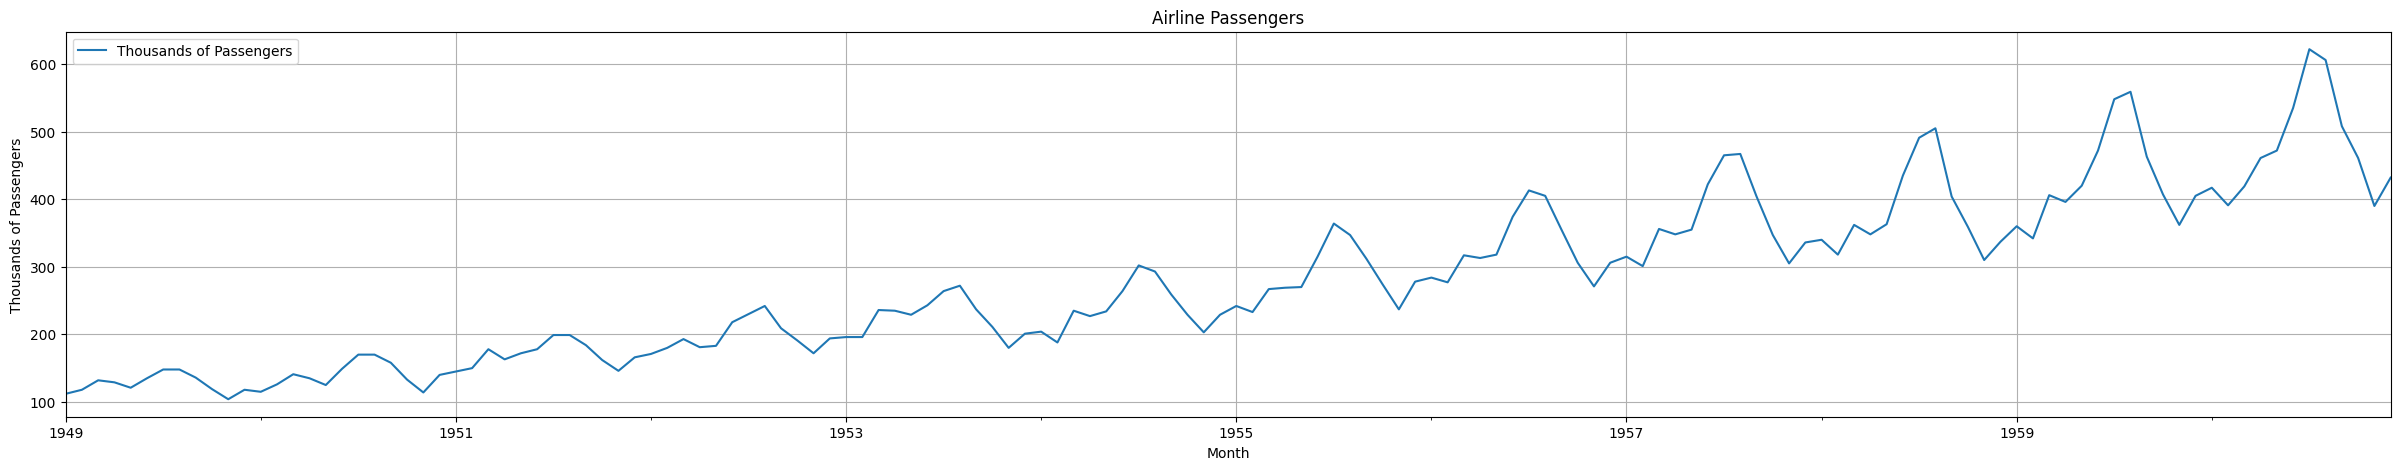

In [60]:
# Load dataset

ts = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv',
                      index_col = 'Month', parse_dates = True)

ts.plot(figsize = (30,5), grid = True, ylabel = 'Thousands of Passengers', title = 'Airline Passengers')
plt.show()

### Forecasting Using SES

#### 1. Select a Model

In [61]:
# We will use Single Exponential Smoothing or Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#### 2. Split data into train & test sets

In [62]:
# Splitting

forecast_horizon = 12 # or periods

train_data = ts.iloc[:-forecast_horizon] # data except the last 12 quarters
test_data = ts.iloc[-forecast_horizon:] # select the last 12 quarters

train_data = train_data.asfreq('QS')
test_data = test_data.asfreq('QS')

#### 3. Fit model on training set

In [63]:
ses_model = SimpleExpSmoothing(train_data).fit()

# ses_model.summary()

#### 4. Evaluate model on test set (visually first)

In [64]:
# Forecast/Predict based on train_data

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
1960-01-01,430.379512
1960-04-01,430.379512
1960-07-01,430.379512
1960-10-01,430.379512
1961-01-01,430.379512
1961-04-01,430.379512
1961-07-01,430.379512
1961-10-01,430.379512
1962-01-01,430.379512
1962-04-01,430.379512


Text(0.5, 0, 'Date')

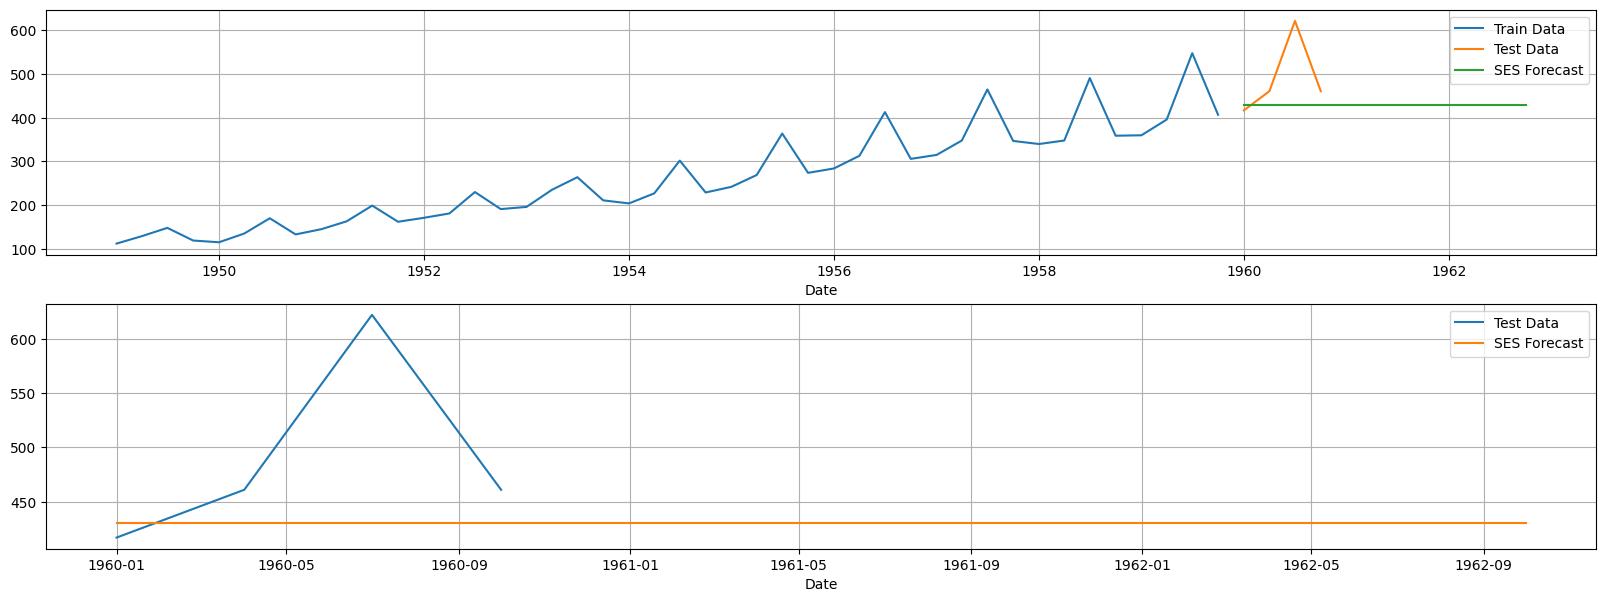

In [65]:
# Visualization

plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data, label = 'Train Data')
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

#### 5. Re-fit model on entire data set

In [66]:
# Notice we are using the entire dataset

ts = ts.asfreq('QS')

ses_model = SimpleExpSmoothing(ts).fit()

6. Forecast for future data

In [67]:
# We forecast using the entire dataset

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
1961-01-01,489.248896
1961-04-01,489.248896
1961-07-01,489.248896
1961-10-01,489.248896
1962-01-01,489.248896
1962-04-01,489.248896
1962-07-01,489.248896
1962-10-01,489.248896
1963-01-01,489.248896
1963-04-01,489.248896


Text(0.5, 0, 'Date')

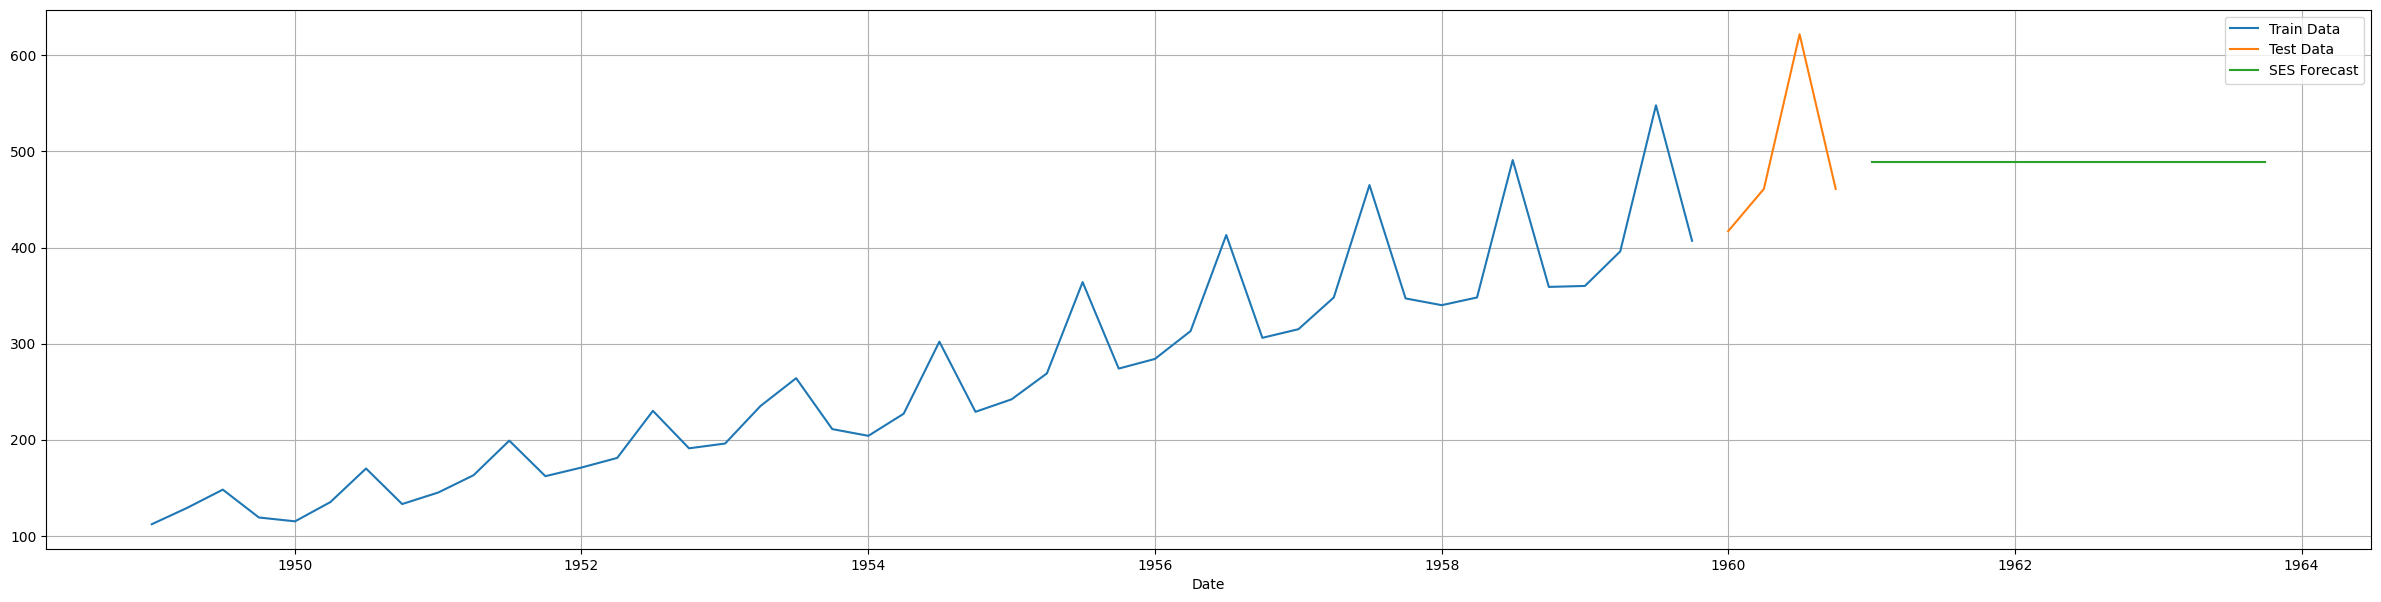

In [68]:
# Visualization

plt.figure(figsize = (30, 7))

plt.subplot(1, 1, 1)
plt.plot(train_data.index, train_data, label = 'Train Data')
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

## 2nd Case (Airline Passengers)

In [69]:
# 1. We have imported a model already
# 2. Splitting

forecast_horizon = 12 # or quarters

train_data = ts.iloc[:-forecast_horizon] # data except the last 12 quarters
test_data = ts.iloc[-forecast_horizon:] # select the last last 12 quarters

train_data = train_data.asfreq('QS')
test_data = test_data.asfreq('QS')

In [70]:
# Fit the model on training

ses_model = SimpleExpSmoothing(train_data).fit()

# Forecast/Predict based on train_data

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
1958-01-01,371.000445
1958-04-01,371.000445
1958-07-01,371.000445
1958-10-01,371.000445
1959-01-01,371.000445
1959-04-01,371.000445
1959-07-01,371.000445
1959-10-01,371.000445
1960-01-01,371.000445
1960-04-01,371.000445


Text(0.5, 0, 'Month')

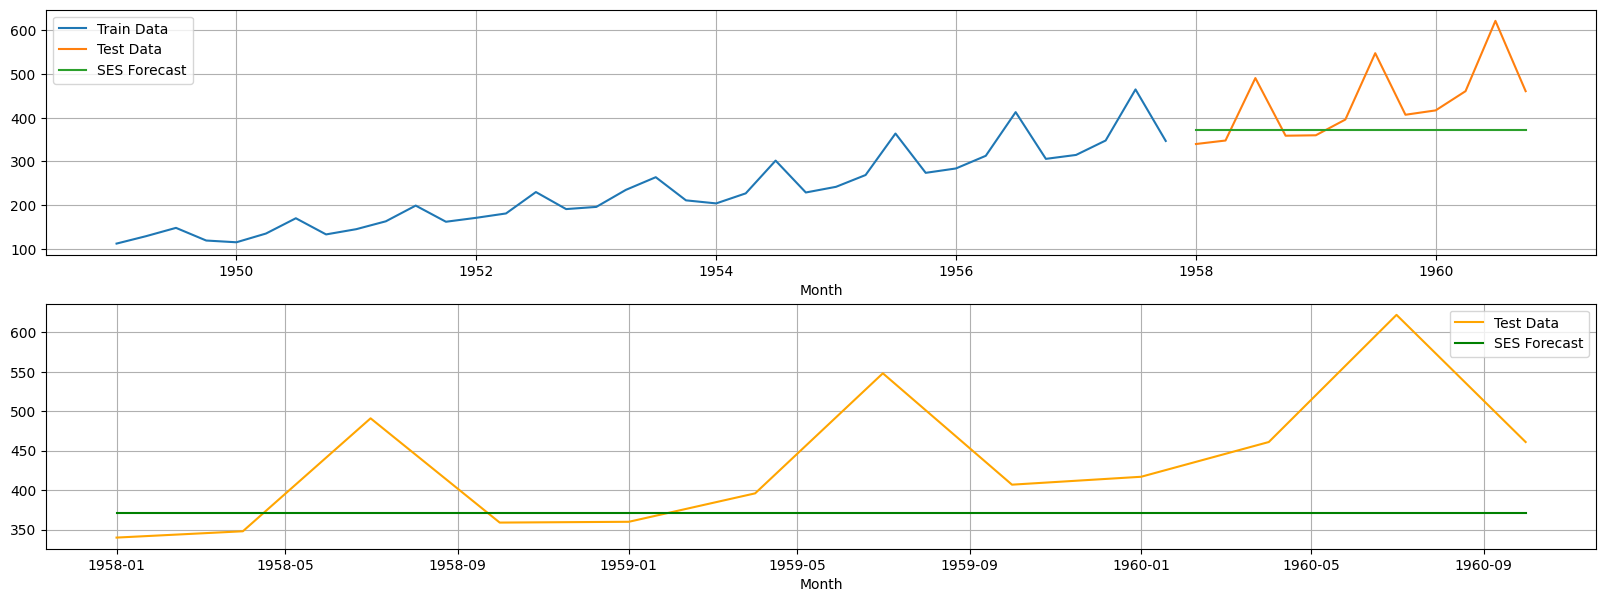

In [71]:
# Visualization

plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data, label = 'Train Data')
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Month')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data, label = 'Test Data', color = 'orange')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast', color = 'green')
plt.legend()
plt.grid()
plt.xlabel('Month')

In [72]:
# Notice we are using the entire dataset

ts = ts.asfreq('QS')

ses_model = SimpleExpSmoothing(ts).fit()

# We forecast using the entire dataset

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
1961-01-01,489.248896
1961-04-01,489.248896
1961-07-01,489.248896
1961-10-01,489.248896
1962-01-01,489.248896
1962-04-01,489.248896
1962-07-01,489.248896
1962-10-01,489.248896
1963-01-01,489.248896
1963-04-01,489.248896


Text(0.5, 0, 'Date')

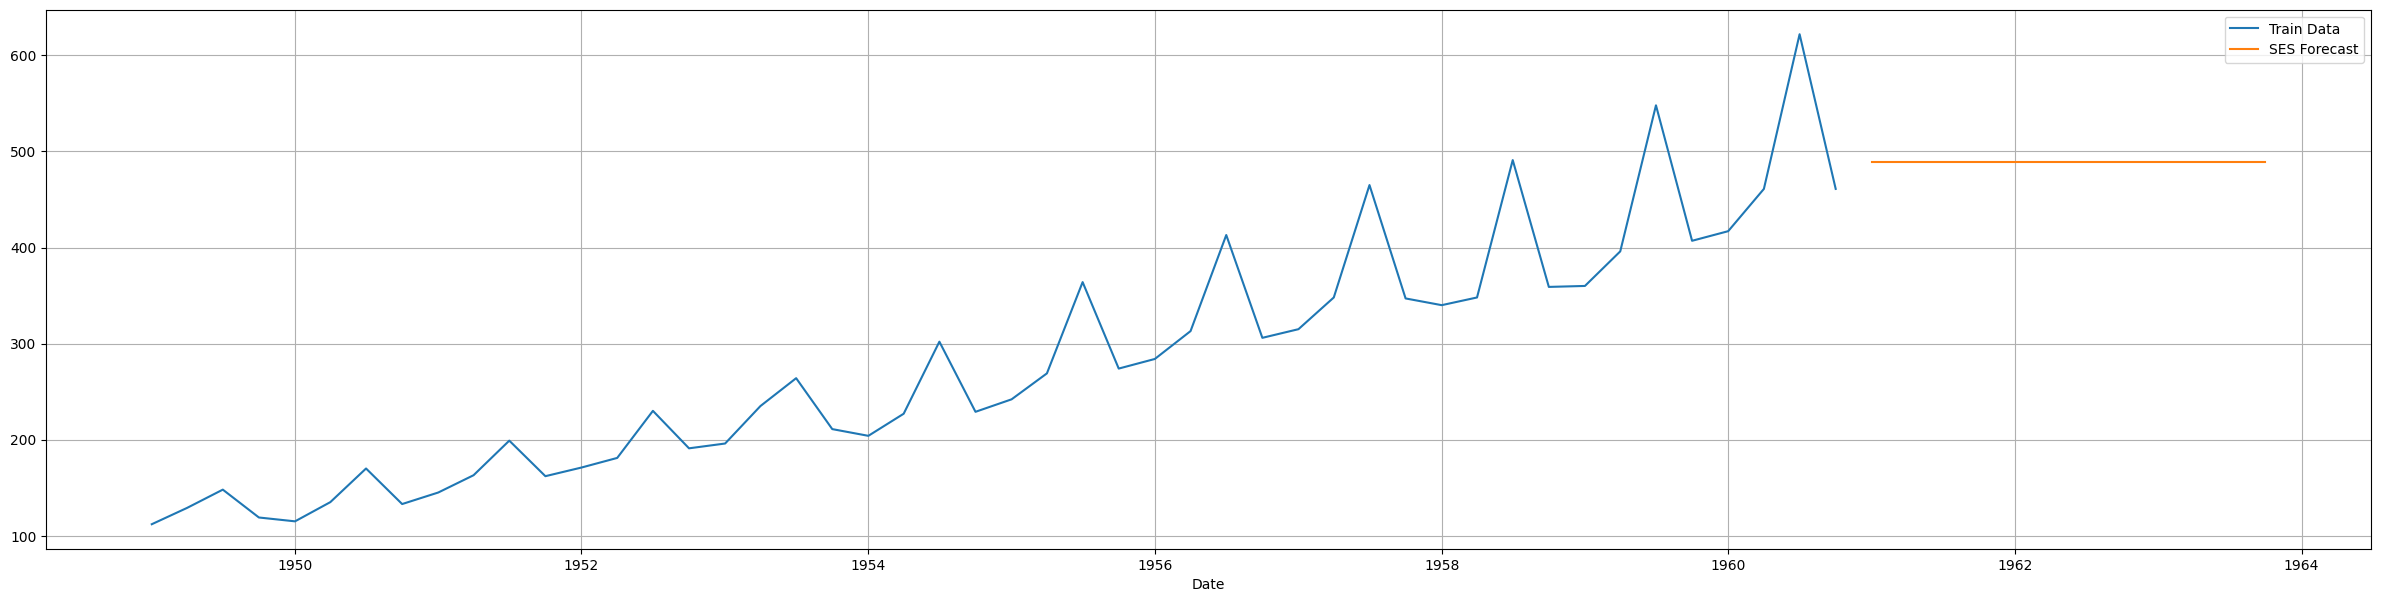

In [75]:
# Visualization

plt.figure(figsize = (30, 7))

plt.subplot(1, 1, 1)
plt.plot(ts.index, ts, label = 'Train Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

In [74]:
# Why the forecast is bad? SES does not account for trend and seasonality